## Convolutional Neural Network Parameters Breakdown

When detecting a shoe, the neural network may have been activated by lots of dark pixels clustered at the bottom of the image, which it would see as the sole of the shoe. But if the shoe were not centered and filling the frame, this logic wouldn’t hold.

One method of detecting features comes from photography and image processing methodologies that you may already be familiar with. If you’ve ever used a tool like Photoshop or GIMP to sharpen an image, you’ve used a mathematical filter that works on the pixels of the image. Another word for what these filters do is convolution, and by using such filters in a neural network, you’ll create a convolutional neural network (CNN).


**A convolution is simply a filter of weights that are used to multiply a pixel by its neighbors to get a new value for the pixel**

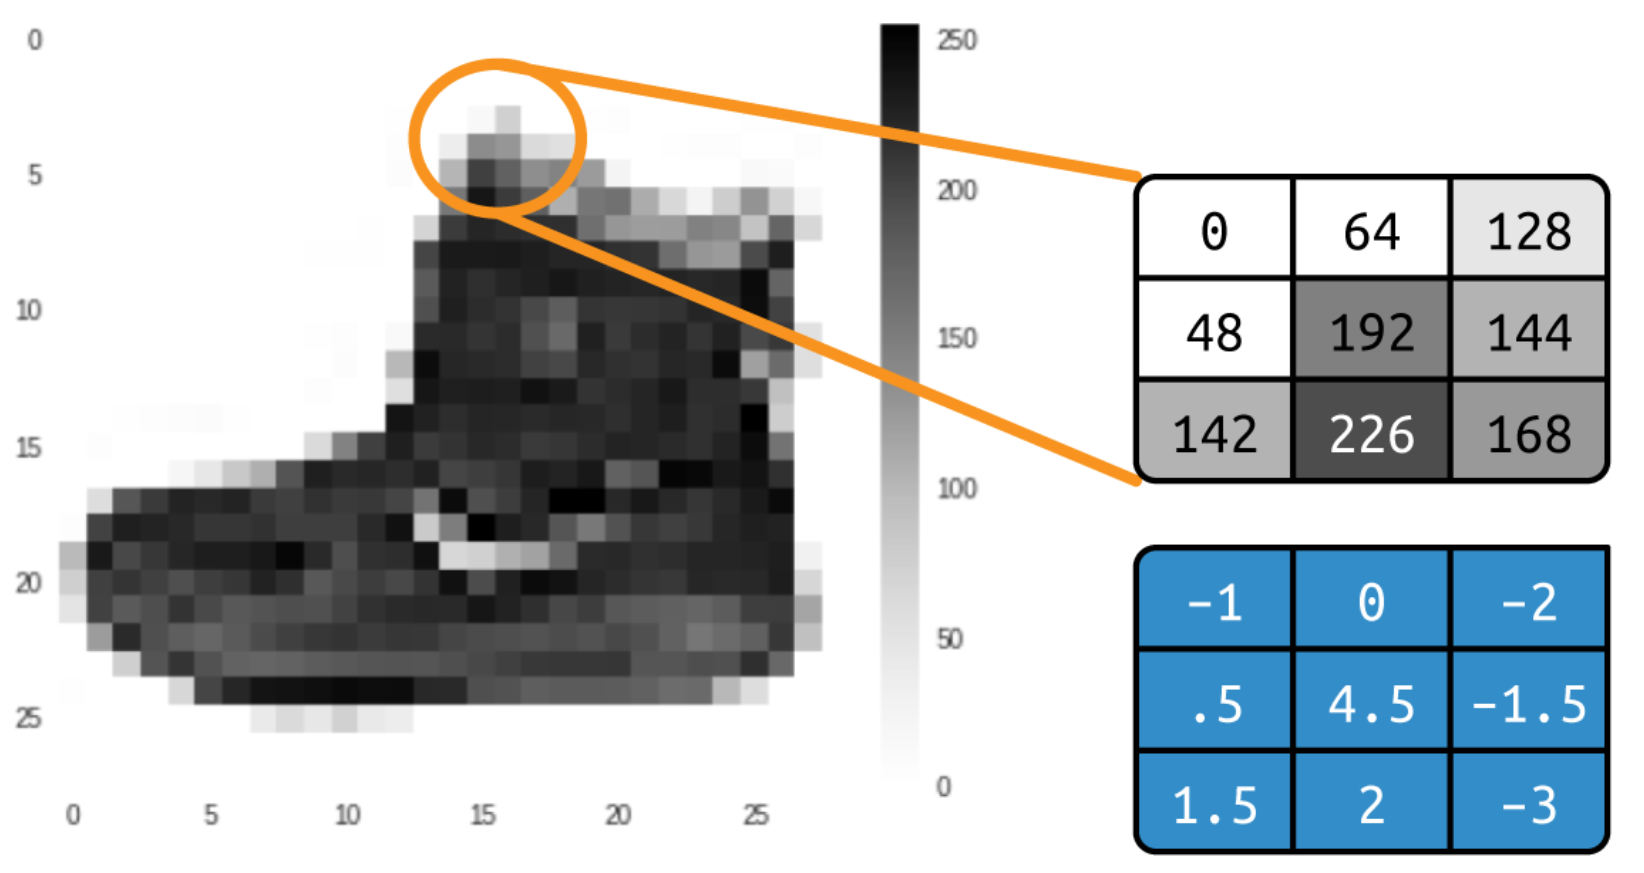

Using a filter with negative values on the left, positive values on the right, and zeros in the middle will end up removing most of the information from the image except for vertical lines 

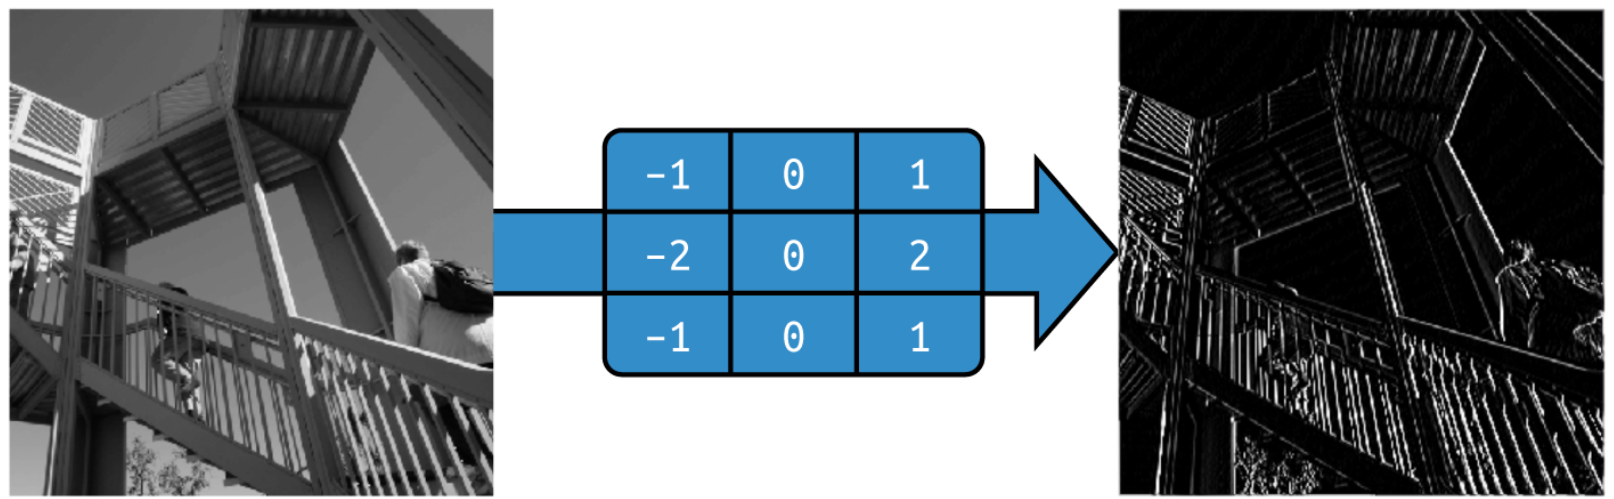

### Pooling
Pooling is the process of eliminating pixels in your image while maintaining the semantics of the content within the image. It’s best explained visually. Figure depicts the concept of max pooling.Four 2 × 2 arrays. These arrays are called pools.

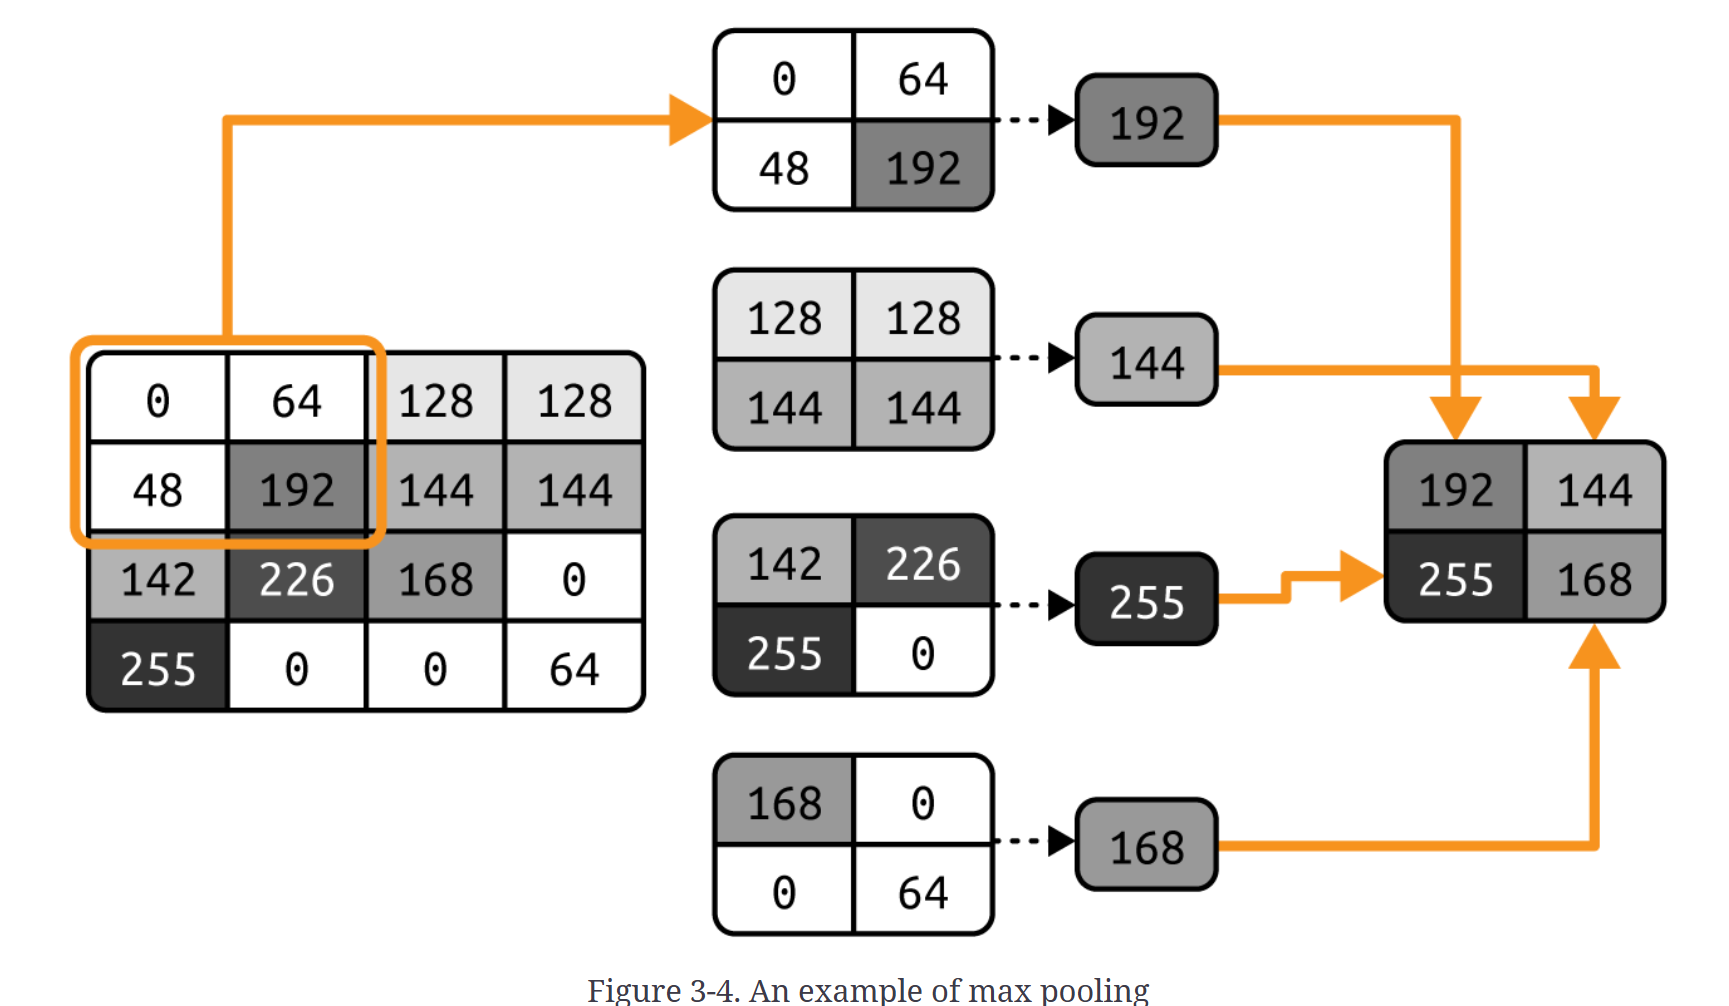

To implement a convolutional layer, you’ll use the nn.Conv2D type. It accepts as parameters the number of convolutions to use in the layer, the size of the convolutions, the activation function, etc.

```
nn.Conv2d(1, 64, kernel_size=3, padding=1)
```
* we want the layer to learn 64 convolutions.
* it will learn the filter values that work best to match the input values to their labels. The kernel_size = 3 indicates the size of the filter.

**You’ll typically do this immediately after the convolutional layer:**

```nn.MaxPool2d(kernel_size=2, stride=2)```

The kernel_size=2 parameter indicates that our pools are 2 × 2, and the stride=2 parameter means that the filter will jump over two pixels to get the next pool.

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [61]:
## define the CNN model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,64,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,64,kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2)) # output = 64 x 6 x 6
        )
        self.fc1 = nn.Linear(64*6*6,128)
        self.fc2 = nn.Linear(128,10)


    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0),-1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

Here, we see that the class has two functions, one for initialization and one that will be called during the forward pass in each epoch during training.

The init simply defines what each of the layers in our neural network will look like. The first layer (self.layer1) will take in the one-dimensional input, have 64 convolutions, a kernel_size of 3, and padding of 1. It will then ReLU the output before max pooling it.

The next layer (self.layer2) will take the 64 convolutions of output from the previous layer and then output 64 of its own before ReLUing them and max pooling them. Its output will now be 64 × 6 × 6 because the MaxPool halves the size of the image.

The data is then fed to the next layer (self.fc1, where fc stands for fully connected), with the input being the shape of the output of the previous layer. The output is 128, which is the same number of neurons we used in Chapter 2 for the deep neural network (DNN).

Finally, these 128 are fed into the final layer (self.fc1) with 10 outputs—that represent the 10 classes.

In [62]:
# !pip install torchsummary
# import torchsummary
# from torchsummary import summary

In [63]:
# model = FashionCNN()
# summary(model,input_size=(1,28,28))#c,w,h

* When we use a filter (like a small 3×3 grid) on an image (like 28×28 pixels), we slide it across the image to look for patterns.

* But there’s a problem:
If we don’t do anything special, using a 3×3 filter will shrink the size of the image because the filter can't go around the very edges. So a 28×28 image becomes 26×26 — we lose one pixel around each border.

* To fix this, we can add padding — extra pixels (usually zeros) around the edge of the image. If we add a 1-pixel border all around (called padding=1), the image becomes 30×30 before the filter is applied. Then, after using the 3×3 filter, the output goes back to 28×28 — and we don’t lose any information!

### First Convolutional Layer:
- **Filter size:** 3 × 3
- **Number of filters (convolutions):** 64
- **Each filter has 9 parameters** (because it’s a 3 × 3 grid).
- **Bias for each filter:** 1 bias per filter.
  
For the first layer:
- **Parameters per filter** = 9 (filter size) + 1 (bias) = **10 parameters per filter**.
- **Total parameters for this layer** = 10 × 64 filters = **640 parameters**.

### Second Convolutional Layer:
- **Number of filters (convolutions):** 64 (again)
- **Input to this layer:** 64 filters from the previous layer, each with 9 parameters.
  
For the second layer:
- **Parameters per filter** = 64 × 9 (each of the 64 filters from the first layer) + 1 bias = 576 + 1 = **577 parameters per filter**.
- **Total parameters for this layer** = 577 × 64 = **36,928 parameters**.

### After the Second Convolution:
- **Output size:** After two convolution layers and pooling (downsampling), the image is reduced to 6 × 6 with 64 feature maps.
- **Total number of values:** 6 × 6 × 64 = **1,600 values**.

This output will be flattened and passed into a **fully connected (dense) layer** of 128 neurons:
- **Parameters for the dense layer** = (1,600 input values × 128 neurons) + 128 biases = 204,800 + 128 = **204,928 parameters**.

### Final Dense Layer:
- **Neurons:** 10 (output layer, likely for classification).
- **Parameters:** 128 neurons from the previous layer × 10 neurons in this layer = 1,280 + 10 (biases) = **1,290 parameters**.

### Total Parameters:
Summing everything up:
- **First convolution layer:** 640 parameters
- **Second convolution layer:** 36,928 parameters
- **First dense layer:** 204,928 parameters
- **Final dense layer:** 1,290 parameters

**Total Parameters = 640 + 36,928 + 204,928 + 1,290 = 333,898 parameters**

### Key Insights:
- The convolution layers are responsible for learning the "features" of the input (like edges, textures, patterns).
- The fully connected layers at the end are responsible for combining these features to make predictions.
- The total number of parameters increases significantly with each additional layer, especially when going from convolutional layers to dense layers.


### Building a CNN to Distinguish Between Horses and Humans

Many image-based datasets do not have labels so you simply need to ensure that your directory structure has a set of named subdirectories, with each subdirectory being a label

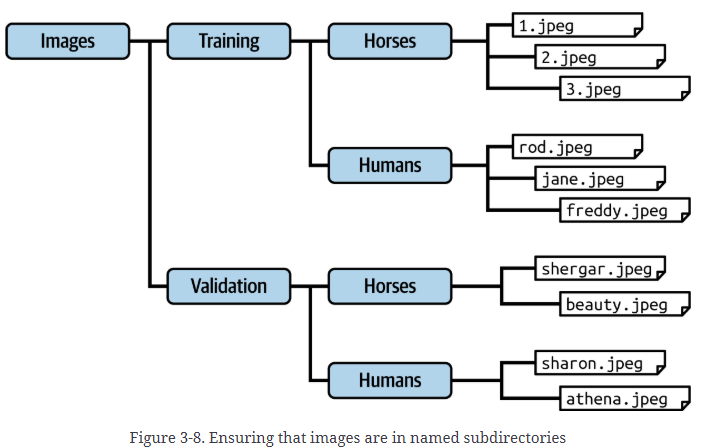

In [64]:
# # this is the code for the training data and extract it into the appropriately named subdirectories
# import os
# import urllib.request
# import zipfile

# url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

# file_name = "horse-or-human.zip"
# training_dir = "horse-or-human/training/"

# if not os.path.exists(training_dir):
#     os.makedirs(training_dir)

# urllib.request.urlretrieve(url,file_name)

# zip_ref = zipfile.ZipFile(file_name,'r')
# zip_ref.extractall(training_dir)
# zip_ref.close()

In [65]:
# from torchvision import datasets,transforms
# from torch.utils.data import DataLoader
# validation_dir = "horse-or-human/validation/"
# # define the transformations 
# transform = transforms.Compose([
#     transforms.Resize((150,150)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
# ])
# # load datasets
# train_dataset = datasets.ImageFolder(root=training_dir,transform=transform)
# val_dataset = datasets.ImageFolder(root=validation_dir,transform=transform)

# train_loader = DataLoader(train_dataset,batch_size=8,shuffle=True)
# val_loader = DataLoader(val_dataset,batch_size=8,shuffle=False)


Importance of the Split:

* Training → for learning patterns.

* Validation → for checking performance and tuning.

* Testing → for final evaluation to ensure generalization.

### CNN Architecture for “Horses or Humans”

In [66]:
# import torch.nn as nn
# class HorseHumansCNN(nn.Module):
#     def __init__(self):
#         super(HorseHumansCNN,self).__init__()
#         self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
#         self.conv2 = nn.Conv2d(16,32,kernel_size=3,padding=1)
#         self.conv3 = nn.Conv2d(32,64,kernel_size=3,padding=1)

#         self.pool = nn.MaxPool2d(2,2)
#         self.fc1 = nn.Linear(64*37*37,512)
#         self.drop = nn.Dropout(0.25)
#         self.fc2 = nn.Linear(512,1)

#     def forward(self,x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(-1,64*37*37)
#         x = F.relu(self.fc1(x))
#         x = self.drop(x)
#         x = self.fc2(x)
#         x = torch.sigmoid(x)
#         return x

In [67]:
# from torchinfo import summary
# model = HorseHumansCNN()
# summary(model, (3,300,300))

In [68]:
# import torch.optim as optim
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(),lr=0.001)

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [70]:
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [73]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"
file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()
     

In [74]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(
        degrees=0,  # No rotation
        translate=(0.2, 0.2),  # Translate up to 20% vertically and horizontally
        scale=(0.8, 1.2),  # Zoom in or out by 20%
        shear=20,  # Shear by up to 20 degrees
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),


])


# Load the datasets
train_dataset = datasets.ImageFolder(root=training_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=validation_dir, transform=train_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HorsesHumansCNN(nn.Module):
    def __init__(self):
        super(HorsesHumansCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 18 * 18, 512)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(512, 1)  # Only 1 output neuron for binary classification

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 18 * 18)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)  # Use sigmoid to output probabilities
        return x


In [78]:
import torch.optim as optim
model = HorsesHumansCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float()  # Convert labels to float
            optimizer.zero_grad()
            outputs = model(images).view(-1)  # Flatten outputs to match label shape
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

        # Evaluate on training set
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device).float()
                outputs = model(images).view(-1)
                predicted = outputs > 0.5  # Threshold predictions
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f'Training Set Accuracy: {100 * correct / total}%')

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device).float()
                outputs = model(images).view(-1)
                predicted = outputs > 0.5  # Threshold predictions
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f'Validation Set Accuracy: {100 * correct / total}%')
train_model(5)

Epoch 1, Loss: 0.6693963348403458
Training Set Accuracy: 69.03602726387537%
Validation Set Accuracy: 48.4375%
Epoch 2, Loss: 0.5628980086293331
Training Set Accuracy: 67.28334956183058%
Validation Set Accuracy: 50.0%
Epoch 3, Loss: 0.5185350726048151
Training Set Accuracy: 76.04673807205452%
Validation Set Accuracy: 48.828125%
Epoch 4, Loss: 0.4282381147608276
Training Set Accuracy: 82.96007789678676%
Validation Set Accuracy: 52.734375%
Epoch 5, Loss: 0.35940089518594187
Training Set Accuracy: 81.3047711781889%
Validation Set Accuracy: 53.125%


In [79]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).float()
        outputs = model(images).view(-1)
        predicted = outputs > 0.5  # Threshold predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(outputs)
        print(labels)
    print(f'Validation Accuracy: {100 * correct / total}%')

tensor([0.8430, 0.8221, 0.7353, 0.8076, 0.9260, 0.4545, 0.9787, 0.9401])
tensor([0., 1., 0., 1., 1., 0., 0., 0.])
tensor([0.0253, 0.6202, 0.8542, 0.9442, 0.9451, 0.9809, 0.9955, 0.7267])
tensor([0., 0., 1., 0., 0., 1., 1., 1.])
tensor([0.4440, 0.7337, 0.5048, 0.9664, 0.1730, 0.3462, 0.9562, 0.2919])
tensor([1., 0., 0., 1., 0., 1., 0., 1.])
tensor([0.6073, 0.8928, 0.8894, 0.2085, 0.8955, 0.5983, 0.5895, 0.9594])
tensor([1., 1., 0., 0., 1., 0., 0., 1.])
tensor([0.8017, 0.7147, 0.9036, 0.9700, 0.8415, 0.9253, 0.6092, 0.7978])
tensor([1., 1., 1., 0., 1., 1., 1., 0.])
tensor([0.3142, 0.9878, 0.6108, 0.0065, 0.6214, 0.6380, 0.4010, 0.9471])
tensor([0., 1., 1., 0., 0., 1., 1., 0.])
tensor([0.7634, 0.7833, 0.8292, 0.2751, 0.4060, 0.2944, 0.9295, 0.6144])
tensor([0., 1., 1., 0., 0., 0., 0., 0.])
tensor([0.7271, 0.7274, 0.4110, 0.9909, 0.5708, 0.2443, 0.9934, 0.9922])
tensor([0., 0., 1., 1., 0., 0., 1., 0.])
tensor([0.9514, 0.7358, 0.9593, 0.9960, 0.9772, 0.9894, 0.5373, 0.4729])
tensor([1., 1.,

In [80]:
from torchsummary import summary
summary(model, input_size=(3, 150, 150))  # (Channels, Height, Width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 150, 150]             448
         MaxPool2d-2           [-1, 16, 75, 75]               0
            Conv2d-3           [-1, 32, 75, 75]           4,640
         MaxPool2d-4           [-1, 32, 37, 37]               0
            Conv2d-5           [-1, 64, 37, 37]          18,496
         MaxPool2d-6           [-1, 64, 18, 18]               0
            Linear-7                  [-1, 512]      10,617,344
           Dropout-8                  [-1, 512]               0
            Linear-9                    [-1, 1]             513
Total params: 10,641,441
Trainable params: 10,641,441
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.26
Forward/backward pass size (MB): 5.98
Params size (MB): 40.59
Estimated Total Size (MB): 46.83
-----------------------------------

In [81]:
from PIL import Image
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def load_image(image_path, transform):
    # Load image
    image = Image.open(image_path).convert('RGB')  # Convert to RGB just in case it's not
    # Apply transformations
    image = transform(image)
    # Add batch dimension, as the model expects batches
    image = image.unsqueeze(0)
    return image

    # Prediction function
def predict(image_path, model, device, transform):
    model.eval()
    image = load_image(image_path, transform)
    image = image.to(device)
    with torch.no_grad():
        output = model(image)
        prediction = output > 0.5
        class_name = "Human" if prediction.item() == 1 else "Horse"
        print(image_path)
        print(f"The image is predicted to be a {class_name}.")
        print(output)

In [94]:
image_paths = "./wall.jpg"
predict(image_paths, model, device, transform)

./wall.jpg
The image is predicted to be a Horse.
tensor([[0.0834]])


## Transfer Learning

**1. Start with a Pretrained Inception Model**

The Inception model is a huge deep learning model trained on millions of images.Since it's already trained, it has "learned" to extract powerful features from images like shapes, colors, and patterns.We’re going to use that knowledge and apply it to a new problem like classifying Horses vs Humans.

**2. Print the Model Structure**

You can inspect the layers of the Inception model with:
```
def print_model_summary(model):
    for name, module in model.named_modules():
        print(f"{name} : {module.__class__.__name__}")
```

This tells you the names of layers.

What type each layer is (Convolution, Pooling, Linear, etc.).

**3. Choose an Intermediate Layer to Use**

There's a special layer called "Mixed_7c" in the model.
The output of that layer is small and neat — it gives 8×8 images (feature maps), which are easier to work with.
You can choose this layer as the cutoff point to stop using the original model.

**4. Freeze the Layers**

We don’t want to retrain the original Inception layers (because it already learned features). So we freeze them:
```
for name, parameter in pre_trained_model.named_parameters():
    parameter.requires_grad = False
    if 'Mixed_7c' in name:
        break
```
This:

Makes all layers up to "Mixed_7c" non-trainable (weights won’t change during training).

Saves time and avoids overfitting.

**5. Modify the Final Layer**

The original model ends with a fully connected (fc) layer used to classify many categories (like dogs, cats, cars, etc.).

But now, you only want to classify 2 categories: horse or human.

So you replace the final part:
````
num_ftrs = pre_trained_model.fc.in_features
pre_trained_model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),  # Add new layer with 1024 neurons
    nn.ReLU(),                  # Add activation function
    nn.Linear(1024, 2)          # Final output layer with 2 neurons
)
````
Here’s what this does:

The first Linear layer connects the output of the old model to 1024 neurons.

Then, we use ReLU to add non-linearity.

Finally, a second Linear layer outputs to 2 neurons (one for Horse, one for Human).

📝 Why 2 neurons instead of 1?

1 neuron + sigmoid → binary classification.

2 neurons + softmax → also binary, but styled for multi-class format (n classes → n outputs). Inception is designed like that, so we stick to the format.

**6. Train the New Model**

You now train only the new layers (the rest is frozen).

Just 3 epochs (passes over the data) gave over 99% accuracy on training data and 95% on validation.

That's very good—thanks to the power of transfer learning from a pretrained model!
